| Problem | Formula|Search Domain|
|---      |----    |----|
|VU1|${\text{Min}}={\begin{cases}f_{1}\left(x_1, x_2\right)=\frac{1}{x^2_1+x^2_2+1}\\f_{2}\left(x_1, x_2\right)={x^2_1+3x^2_2+1}\end{cases}}$|$-3\leq{x_1,x_2}\leq3$|
|VU2|${\text{Min}}={\begin{cases}f_{1}\left(x_1, x_2\right)=x_1+x_2+1\\f_{2}\left(x_1, x_2\right)={x^2_1+2x^2_2-1}\end{cases}}$|$-3\leq{x_1,x_2}\leq3$ |

In [1]:
import time 
import xlsxwriter
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
from pymoo.indicators.igd_plus import IGDPlus
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images
import pandas as pd 
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 
ref_point = None
pf = None
def calculate_hv(result):
    path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),result['path'])
    F = np.loadtxt(path)
    nadir_point = np.max(F,axis=0)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    igd_plus = IGDPlus(pf,zero_to_one=False)
    start_time = time.time()
    hv = metric.do(F)
    igd_plus = igd_plus.do(F)
    exc_time = time.time() - start_time
    return [hv,igd_plus,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['hv','igd_plus','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)
    #final_result.loc[:,'nadir_point'] =  list(nadir_arr)
    final_result.loc[:,'ref_point'] = str(ref_point)
    final_result = final_result[['Problem', 'Objectives', 'n_variables', 'pf_shape', 
            'hv', 'igd_plus','nadir_point', 
            'data_point_shape', 
            'path', 'image_location', 
            'hv_exc_time', 'ref_point']]
    print(f'ref_point is {ref_point}')
    return final_result
cdir =os.getcwd()
pd.set_option('display.float_format', lambda x : "%.7f" % x)

# Kursawe problem 
## - (#variables / #objectives)
## - vu1 2/2
## - vu2 2/2
 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`

In [2]:
pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
folder_2 = os.path.dirname(folder)
folder_2
filename = 'Random_Search_Result'
path = os.path.join(folder, filename)

result = pd.read_csv(path)
result['path'] = result['path'].str[39:]
result['image_location'] = result['image_location'].str[39:]
result = result.drop(columns=['xl','xu'])

def nadir_get(result_cc):
    path = os.path.join(folder_2,result_cc)
    F = np.loadtxt(path)
    if np.ndim(F) ==1:
        return F
    else: 
        nadir_point = np.max(F,axis=0)
        return nadir_point


result.loc[:,'nadir_point'] = result['path'].apply(nadir_get)
result = result.loc[(result['Problem']=='VU1' )| (result['Problem']=='VU2') ].reset_index(drop=True)

print(f"The number of records {len(result)}")

The number of records 26


In [3]:
#path and image path indicating location of objective file and visualization file
result.iloc[:,-2:].head(5)

,image_location,nadir_point
0,Result/Images/Random_Search/VU1/VU1_Obj-2_Var-...,"[0.8421623972112153, 35.216300754990264]"
1,Result/Images/Random_Search/VU1/VU1_Obj-2_Var-...,"[0.8785147211202669, 35.19792965853094]"
2,Result/Images/Random_Search/VU1/VU1_Obj-2_Var-...,"[0.955431800679792, 36.00697271610093]"
3,Result/Images/Random_Search/VU1/VU1_Obj-2_Var-...,"[0.9567464932065676, 35.754325303393024]"
4,Result/Images/Random_Search/VU1/VU1_Obj-2_Var-...,"[0.9701349709871193, 36.06685328772097]"


In [4]:
vu1 = result.loc[result['Problem']=='VU1'].reset_index(drop=True)
vu2 = result.loc[result['Problem']=='VU2'].reset_index(drop=True)

# VU1 

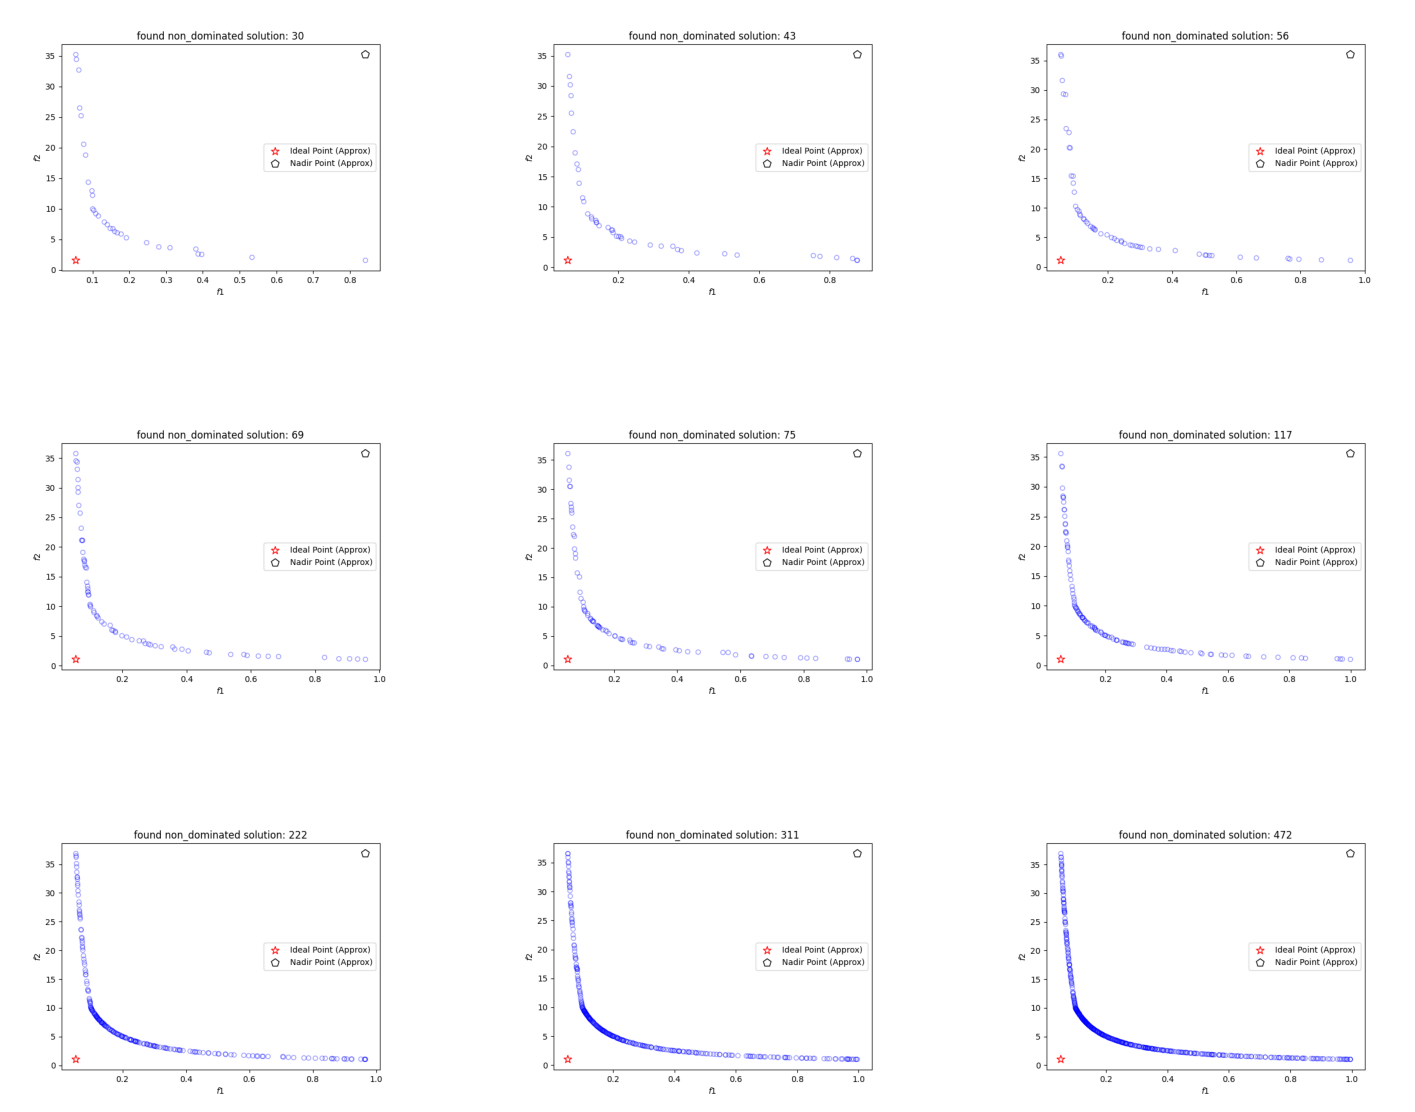

In [5]:
# more figures can be found here: Result/Images/VU1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = vu1['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.axis('off')
    plt.imshow(img)

In [7]:

nadir_arr  = np.array([i for i in np.array(vu1['nadir_point'])])

print(np.round(np.max(nadir_arr, axis=0)))
ref_point = np.array([1  ,37])
pf = np.loadtxt(os.path.join(cdir, 'Bench/vu1_pf' ))
vu1_table =  hv_result(vu1)
vu1_table

[ 1. 37.]
ref_point is [ 1 37]


,Problem,Objectives,n_variables,pf_shape,hv,igd_plus,nadir_point,data_point_shape,path,image_location,hv_exc_time,ref_point
0,VU1,2,2,30,31.1674794,0.1277537,"[0.8421623972112153, 35.216300754990264]",100,Result/Random_Search/VU1/VU1_Obj-2_Var-2.d1dd4...,Result/Images/Random_Search/VU1/VU1_Obj-2_Var-...,0.0091572,[ 1 37]
1,VU1,2,2,43,31.3206088,0.0546847,"[0.8785147211202669, 35.19792965853094]",200,Result/Random_Search/VU1/VU1_Obj-2_Var-2.ff7e5...,Result/Images/Random_Search/VU1/VU1_Obj-2_Var-...,0.0109479,[ 1 37]
2,VU1,2,2,56,31.4698528,0.0253979,"[0.955431800679792, 36.00697271610093]",300,Result/Random_Search/VU1/VU1_Obj-2_Var-2.3c83a...,Result/Images/Random_Search/VU1/VU1_Obj-2_Var-...,0.0142090,[ 1 37]
3,VU1,2,2,69,31.5463442,0.0210596,"[0.9567464932065676, 35.754325303393024]",500,Result/Random_Search/VU1/VU1_Obj-2_Var-2.6518b...,Result/Images/Random_Search/VU1/VU1_Obj-2_Var-...,0.0257938,[ 1 37]
4,VU1,2,2,75,31.5588883,0.0191972,"[0.9701349709871193, 36.06685328772097]",600,Result/Random_Search/VU1/VU1_Obj-2_Var-2.2a1fd...,Result/Images/Random_Search/VU1/VU1_Obj-2_Var-...,0.0272660,[ 1 37]
5,VU1,2,2,117,31.6231778,0.0132512,"[0.9992944814805201, 35.57229386677463]",1000,Result/Random_Search/VU1/VU1_Obj-2_Var-2.e2591...,Result/Images/Random_Search/VU1/VU1_Obj-2_Var-...,0.0329700,[ 1 37]
6,VU1,2,2,222,31.6980612,0.0068962,"[0.9662527312586131, 36.847607148570646]",3000,Result/Random_Search/VU1/VU1_Obj-2_Var-2.d6f49...,Result/Images/Random_Search/VU1/VU1_Obj-2_Var-...,0.0560546,[ 1 37]
7,VU1,2,2,311,31.7200940,0.0037869,"[0.9958747818625715, 36.56081080117096]",6000,Result/Random_Search/VU1/VU1_Obj-2_Var-2.ca808...,Result/Images/Random_Search/VU1/VU1_Obj-2_Var-...,0.0923910,[ 1 37]
8,VU1,2,2,472,31.7347374,0.0024671,"[0.9956173674668815, 36.9097859284041]",10000,Result/Random_Search/VU1/VU1_Obj-2_Var-2.215ba...,Result/Images/Random_Search/VU1/VU1_Obj-2_Var-...,0.1344981,[ 1 37]
9,VU1,2,2,602,31.7424054,0.0020941,"[0.9974810133394328, 36.68812093180308]",15000,Result/Random_Search/VU1/VU1_Obj-2_Var-2.46545...,Result/Images/Random_Search/VU1/VU1_Obj-2_Var-...,0.1859579,[ 1 37]


## vu1 (5,5)

In [8]:
ref_point = np.array([5  ,5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/vu1_pf' ))
vu1_table_2 =  hv_result(vu1)

ref_point is [5 5]


In [9]:
ref_point = np.array([5  ,35])
pf = np.loadtxt(os.path.join(cdir, 'Bench/vu1_pf' ))
vu1_table_3 =  hv_result(vu1)

ref_point is [ 5 35]


## Vu1: (5,35)

In [10]:
pd.concat([vu1_table,vu1_table_2,vu1_table_3]).to_excel('Excel/Excel_Random/vu1.xlsx', engine = 'xlsxwriter')

# VU2 

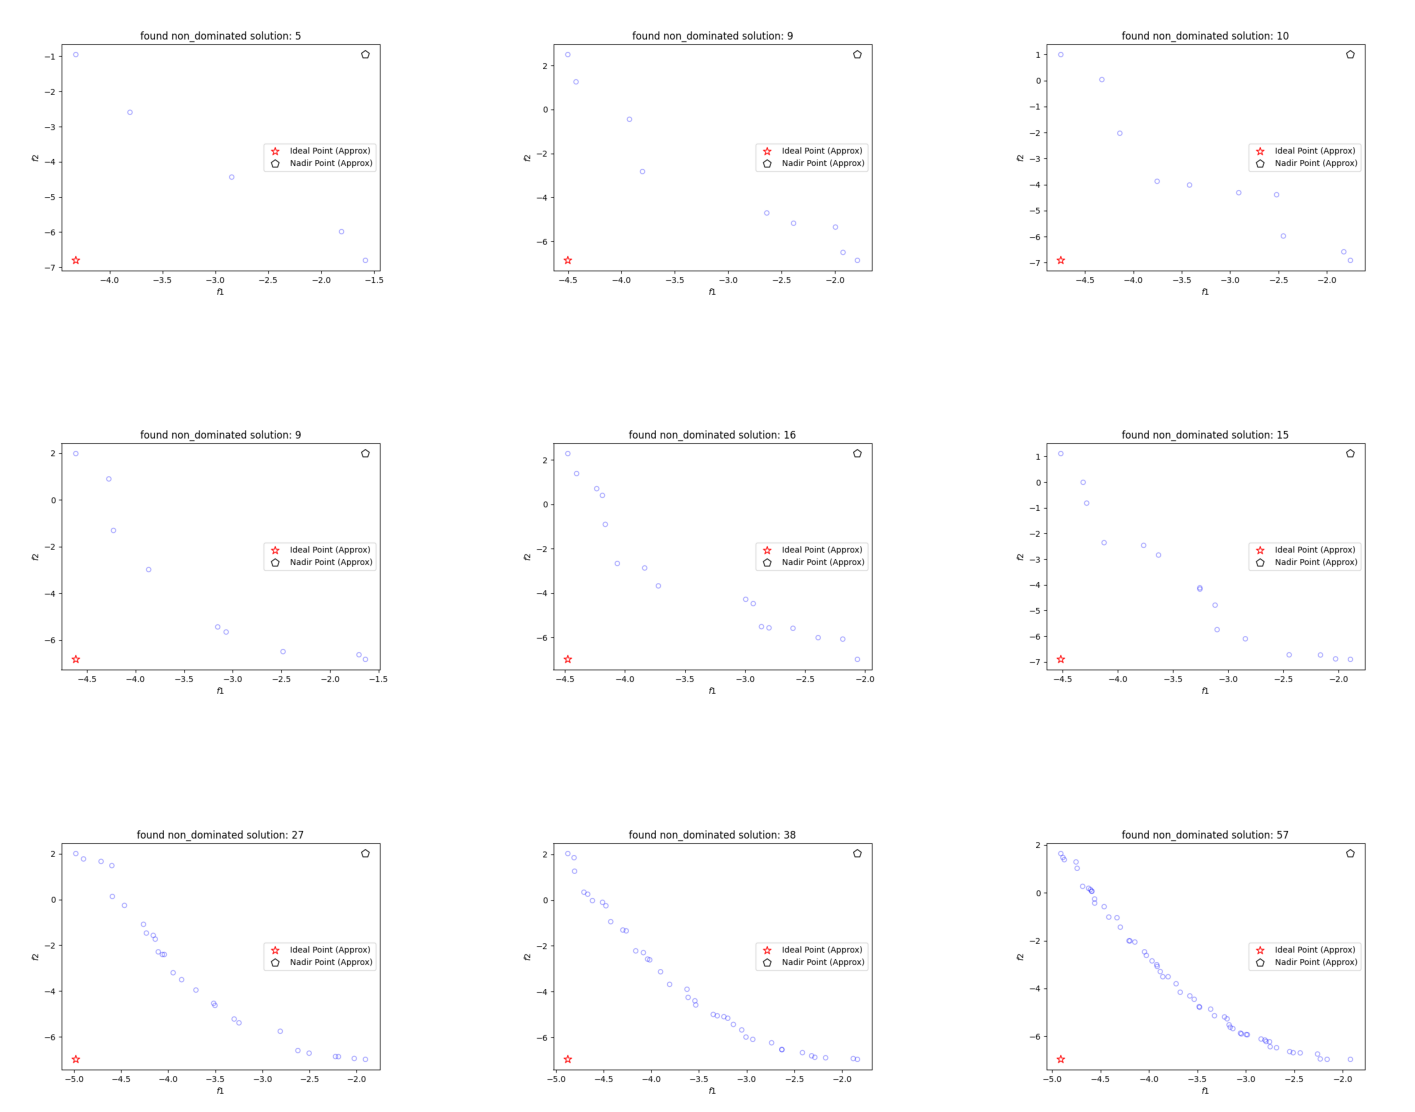

In [11]:
# more figures can be found here: Result/Images/VU2/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = vu2['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)

    plt.axis('off')
    plt.imshow(img)

In [13]:
nadir_arr  = np.array([i for i in np.array(vu2['nadir_point'])])

print(np.round(np.max(nadir_arr, axis=0)))
ref_point = np.array([-2,3 ])
pf = np.loadtxt(os.path.join(cdir, 'Bench/vu2_pf' ))
vu2_table_1 = hv_result(vu2)

[-2.  3.]
ref_point is [-2  3]


In [14]:
ref_point = np.array([5, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/vu2_pf' ))
vu2_table_2 = hv_result(vu2)

ref_point is [5 5]


In [16]:
ref_point = np.array([5, 35])
pf = np.loadtxt(os.path.join(cdir, 'Bench/vu2_pf' ))
vu2_table_3 = hv_result(vu2)

ref_point is [ 5 35]


In [17]:
pd.concat([vu2_table_1,vu2_table_2,vu2_table_3]).to_excel('Excel/Excel_Random/vu2.xlsx', engine = 'xlsxwriter')